In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import ttest_ind

In [371]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

descriptive statitics


In [372]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [373]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [374]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())


In [375]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [376]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)
df=df[~((df<q1-1.5*iqr)|(df>q3+1.5*iqr)).any(axis=1)]
df.describe()

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.364780,71.850629,26.073899,70.972484,31.681289,0.420412,32.427673,0.316038
std,3.221219,28.674535,10.750778,7.462824,58.770550,6.290221,0.245641,10.866670,0.465294
min,0.000000,44.000000,44.000000,10.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.200000,0.237000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,30.500000,31.600000,0.343000,29.000000,0.000000
75%,6.000000,135.000000,78.000000,31.000000,105.000000,35.425000,0.580500,39.000000,1.000000
max,13.000000,197.000000,104.000000,45.000000,272.000000,50.000000,1.191000,66.000000,1.000000


### Insights
#### ranges of each column


##### Blood Pressure:60-120
##### Glucose:70-120
##### Skin Thickness:10-50 mm
##### BMI:18-50
##### Insulin:16-166

In [377]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df.describe().loc[['min','max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0.0,44.0,44.0,10.0,15.0,18.2,0.078,21.0,0.0
max,13.0,197.0,104.0,45.0,272.0,50.0,1.191,66.0,1.0


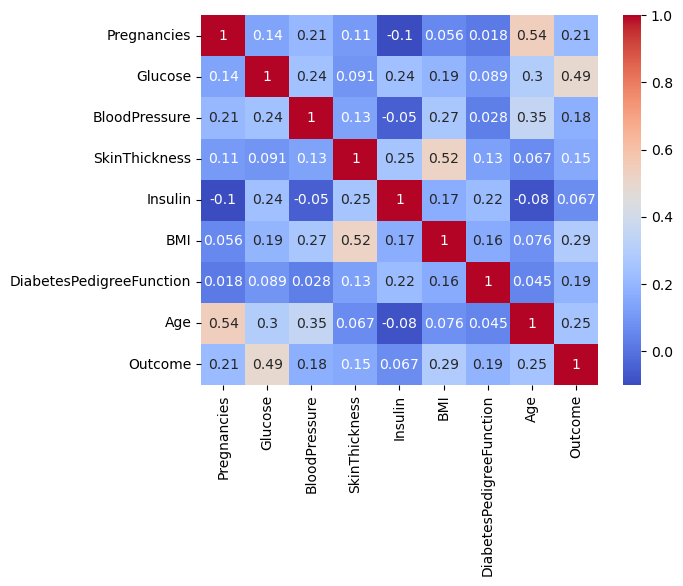

In [378]:
plt.Figure(figsize=(1,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [379]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.364780,71.850629,26.073899,70.972484,31.681289,0.420412,32.427673,0.316038
std,3.221219,28.674535,10.750778,7.462824,58.770550,6.290221,0.245641,10.866670,0.465294
min,0.000000,44.000000,44.000000,10.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.200000,0.237000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,30.500000,31.600000,0.343000,29.000000,0.000000
75%,6.000000,135.000000,78.000000,31.000000,105.000000,35.425000,0.580500,39.000000,1.000000
max,13.000000,197.000000,104.000000,45.000000,272.000000,50.000000,1.191000,66.000000,1.000000


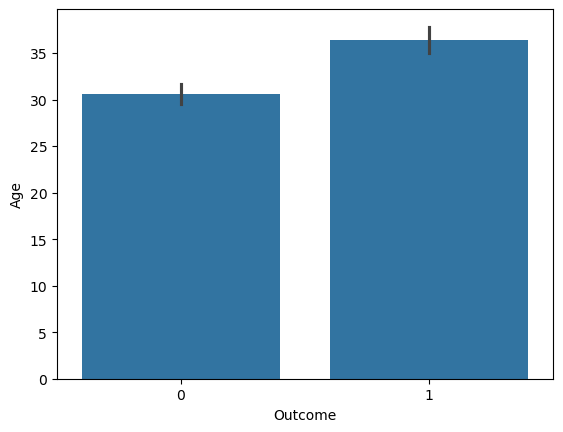

In [380]:
sns.barplot(y="Age",x="Outcome",data=df)
plt.show()

In [381]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    30.586207
1    36.412935
Name: Age, dtype: float64

<Axes: xlabel='Outcome', ylabel='Age'>

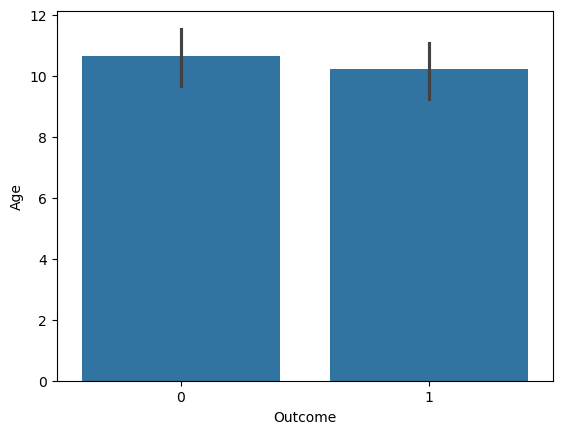

In [382]:
sns.barplot(y="Age",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='Age', ylabel='Count'>

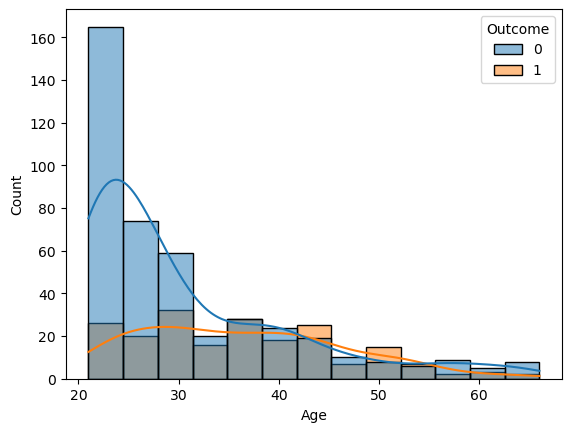

In [383]:
sns.histplot(x="Age",hue="Outcome",data=df,kde=True)

In [384]:
df.Outcome.value_counts()

Outcome
0    435
1    201
Name: count, dtype: int64

In [385]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.454253
1    34.336816
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Count'>

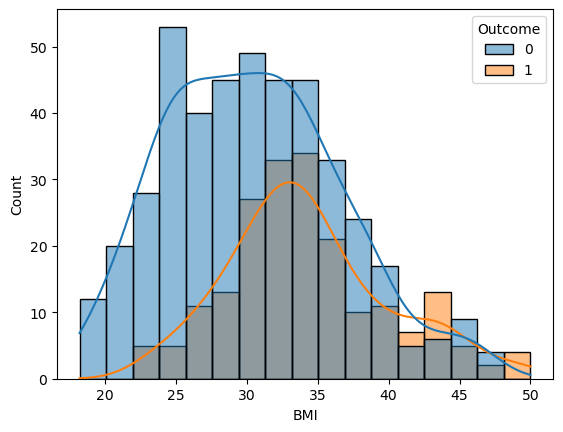

In [386]:
sns.histplot(x="BMI",hue="Outcome",data=df,kde=True)

<Axes: xlabel='Outcome', ylabel='BMI'>

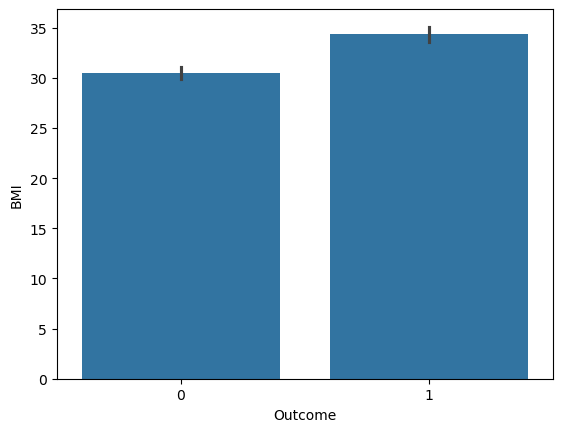

In [387]:
sns.barplot(y="BMI",x="Outcome",data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

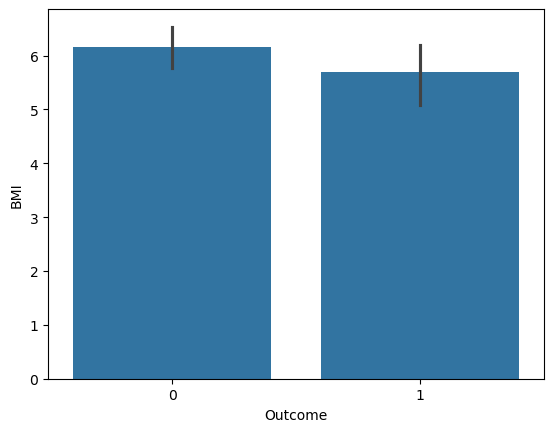

In [388]:
sns.barplot(y="BMI",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='BMI', ylabel='Count'>

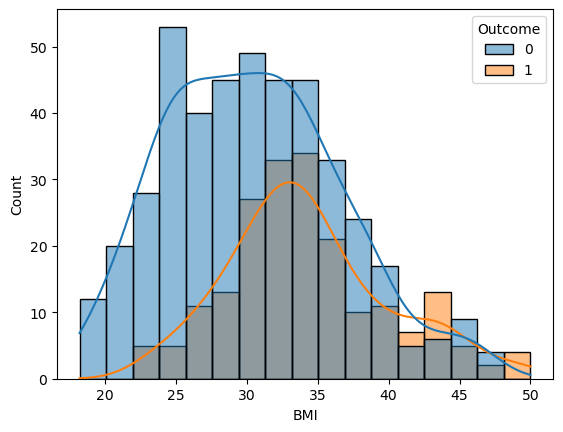

In [389]:
sns.histplot(x="BMI",hue="Outcome",data=df,kde=True)

In [390]:
df.Outcome.value_counts()

Outcome
0    435
1    201
Name: count, dtype: int64

In [391]:
die_age=df['Age'][df['Outcome']==1]
nondie_ade=df['Age'][df['Outcome']==0]

In [392]:
stat,p=ttest_ind(die_age,nondie_ade)
print(stat,p)
alpha=0.05
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.487175902320353 1.7624848701812833e-10
reject null hypothesis


In [393]:
die_bmi=df['BMI'][df['Outcome']==1]
nondie_bmi=df['BMI'][df['Outcome']==0]

In [394]:
stat,p=ttest_ind(die_bmi,nondie_bmi)
print(stat,p)
alpha=0.05
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

7.549483146842756 1.5277928251075007e-13
reject null hypothesis


In [395]:
df['BloodPressure'].groupby(df['Outcome']).median()

Outcome
0    70.0
1    74.0
Name: BloodPressure, dtype: float64

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

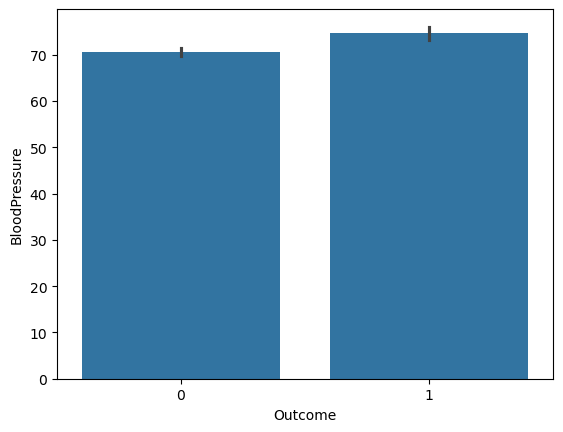

In [396]:
sns.barplot(y="BloodPressure",x="Outcome",data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

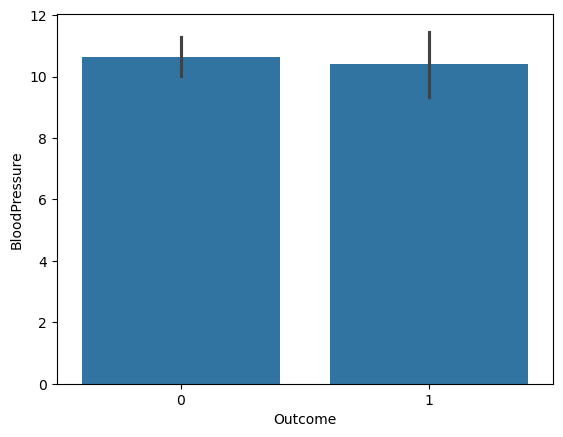

In [397]:
sns.barplot(y="BloodPressure",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='BloodPressure', ylabel='Count'>

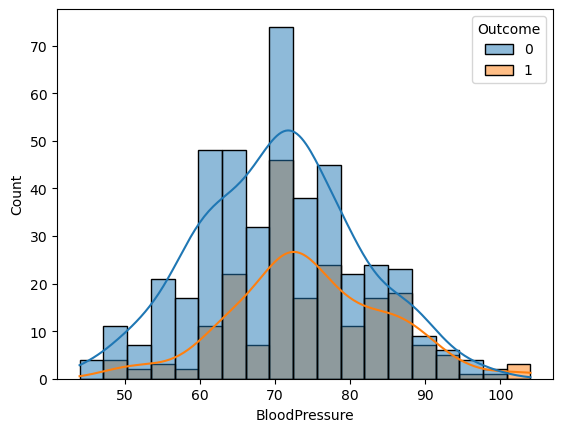

In [398]:
sns.histplot(x="BloodPressure",hue="Outcome",data=df,kde=True)

In [399]:
df.Outcome.value_counts()

Outcome
0    435
1    201
Name: count, dtype: int64

In [400]:
die_BP=df['BloodPressure'][df['Outcome']==1]
nondie_BP=df['BloodPressure'][df['Outcome']==0]

In [401]:
stat,p=ttest_ind(die_BP,nondie_BP)
print(stat,p)
alpha=0.05
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.5431572516794 6.635826528791894e-06
reject null hypothesis


In [402]:
df['Glucose'].groupby(df['Outcome']).median()

Outcome
0    106.0
1    134.0
Name: Glucose, dtype: float64

<Axes: xlabel='Outcome', ylabel='Glucose'>

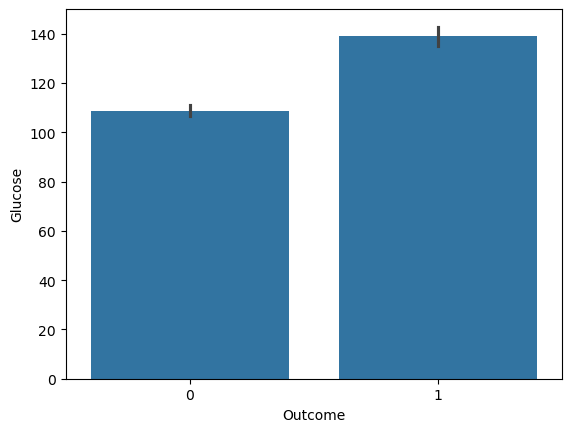

In [403]:
sns.barplot(y="Glucose",x="Outcome",data=df)

<Axes: xlabel='Outcome', ylabel='Glucose'>

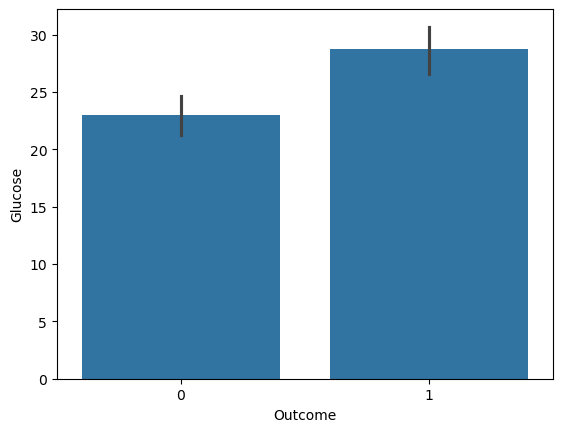

In [404]:
sns.barplot(y="Glucose",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='Glucose', ylabel='Count'>

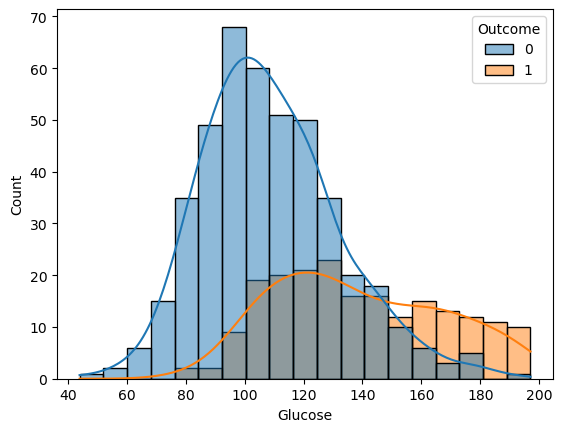

In [405]:
sns.histplot(x="Glucose",hue="Outcome",data=df,kde=True)

In [406]:
die_glucose=df['Glucose'][df['Outcome']==1]
nondie_glucose=df['Glucose'][df['Outcome']==0]

In [407]:
stat,p=ttest_ind(die_glucose,nondie_glucose)
print(stat,p)
alpha=0.05
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

14.163734072469259 9.118647259857074e-40
reject null hypothesis


In [408]:
df['Insulin'].groupby(df['Outcome']).mean()

Outcome
0    68.280460
1    76.798507
Name: Insulin, dtype: float64

<Axes: xlabel='Outcome', ylabel='Insulin'>

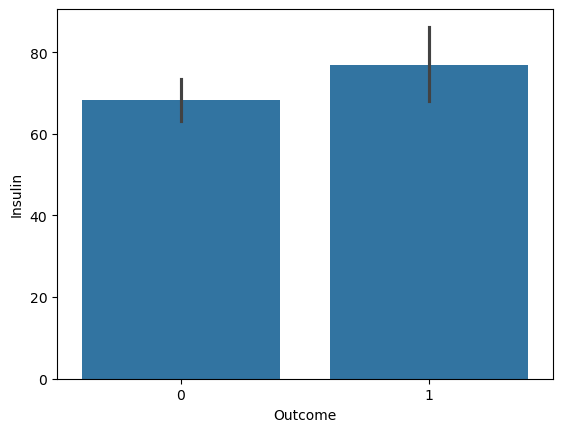

In [409]:
sns.barplot(y="Insulin",x="Outcome",data=df)

<Axes: xlabel='Outcome', ylabel='Insulin'>

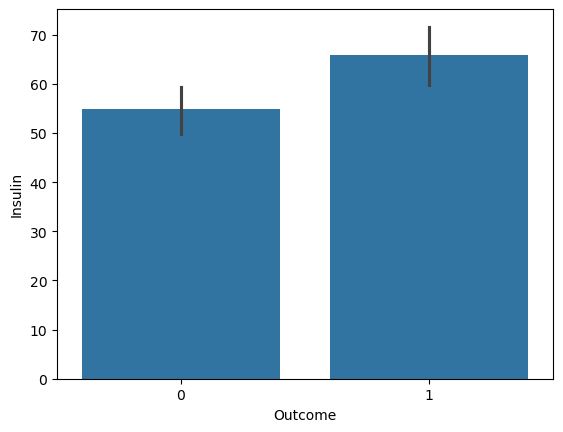

In [410]:
sns.barplot(y="Insulin",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='Insulin', ylabel='Count'>

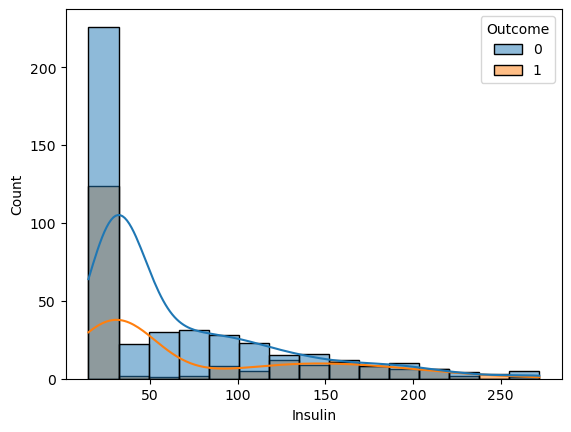

In [411]:
sns.histplot(x="Insulin",hue="Outcome",data=df,kde=True)

In [412]:
die_insulin=df['Insulin'][df['Outcome']==1]
nondie_insulin=df['Insulin'][df['Outcome']==0]

In [413]:
stat,p=ttest_ind(die_insulin,nondie_insulin)
print(stat,p)
alpha=0.05  
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.7019312059255591 0.08925850464378055
accept null hypothesis


In [414]:
df['SkinThickness'].groupby(df['Outcome']).mean()

Outcome
0    25.294253
1    27.761194
Name: SkinThickness, dtype: float64

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

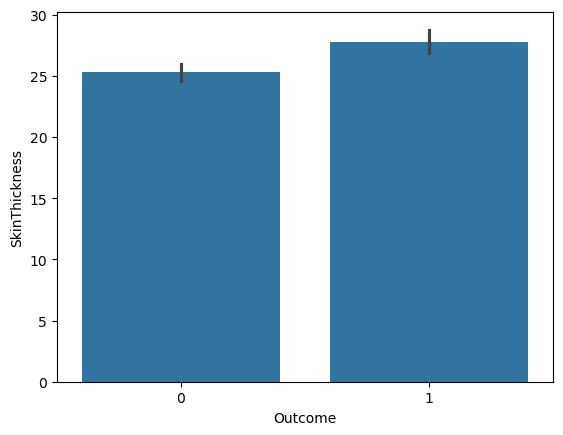

In [415]:
sns.barplot(y="SkinThickness",x="Outcome",data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

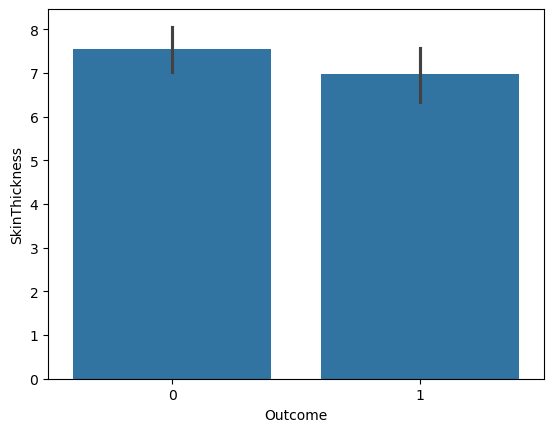

In [416]:
sns.barplot(y="SkinThickness",x="Outcome",data=df,estimator=np.std)

<Axes: xlabel='SkinThickness', ylabel='Count'>

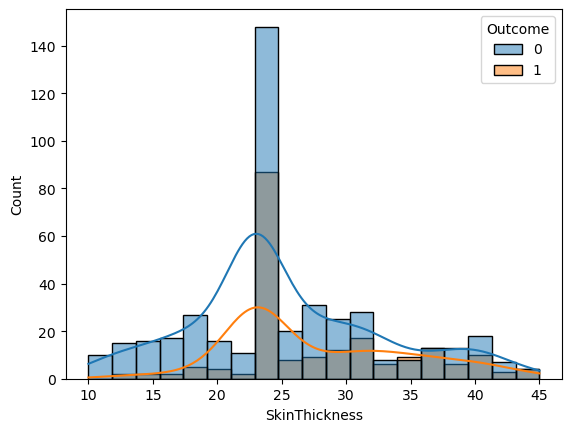

In [417]:
sns.histplot(x="SkinThickness",hue="Outcome",data=df,kde=True)

In [418]:
die_skin=df['SkinThickness'][df['Outcome']==1]
nondie_skin=df['SkinThickness'][df['Outcome']==0]

In [419]:
stat,p=ttest_ind(die_skin,nondie_skin)
print(stat,p)
alpha=0.05  
if p<alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.919460728403144 9.8404836408362e-05
reject null hypothesis


In [420]:
for i in df.columns:
    print("h0 is rejected for",i,", disimilarity")
    

h0 is rejected for Pregnancies , disimilarity
h0 is rejected for Glucose , disimilarity
h0 is rejected for BloodPressure , disimilarity
h0 is rejected for SkinThickness , disimilarity
h0 is rejected for Insulin , disimilarity
h0 is rejected for BMI , disimilarity
h0 is rejected for DiabetesPedigreeFunction , disimilarity
h0 is rejected for Age , disimilarity
h0 is rejected for Outcome , disimilarity


In [421]:
def out(i):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    if df[i].min()<lower_bound or df[i].max()>upper_bound:
        print(f"{i} has outliers")
    else:
        print(f"{i} has no outliers")
for i in df.columns:
    out(i)

Pregnancies has no outliers
Glucose has outliers
BloodPressure has outliers
SkinThickness has outliers
Insulin has outliers
BMI has outliers
DiabetesPedigreeFunction has outliers
Age has outliers
Outcome has no outliers


In [422]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [423]:
df['BloodPressure']=scaler.fit_transform(df[['BloodPressure']])
df['Glucose']=scaler.fit_transform(df[['Glucose']])
df['Insulin']=scaler.fit_transform(df[['Insulin']])
df['SkinThickness']=scaler.fit_transform(df[['SkinThickness']])
df['BMI']=scaler.fit_transform(df[['BMI']])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,1.034317,0.013905,1.197017,-0.689194,0.305271,0.627,50,1
1,1,-1.164484,-0.544634,0.392399,-0.689194,-0.808444,0.351,31,0
2,8,2.255873,-0.730813,-0.412219,-0.689194,-1.333480,0.672,32,1
3,1,-1.024878,-0.544634,-0.412219,0.392129,-0.569791,0.167,21,0
5,5,-0.082535,0.200084,-0.412219,-0.689194,-0.967546,0.201,30,0


In [424]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\charm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7853403141361257

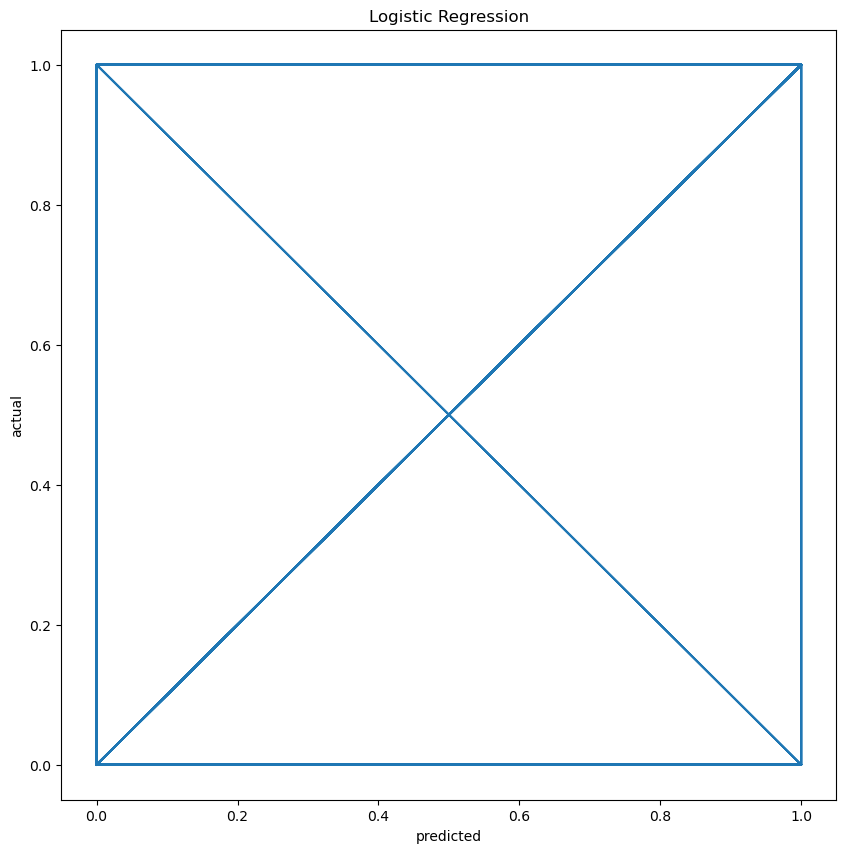

In [425]:
plt.figure(figsize=(10,10))
plt.plot(model.predict(x_test),y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Logistic Regression")
plt.show()

In [426]:
confusion_matrix(y_test,model.predict(x_test))

array([[119,   8],
       [ 33,  31]])

In [427]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       127
           1       0.79      0.48      0.60        64

    accuracy                           0.79       191
   macro avg       0.79      0.71      0.73       191
weighted avg       0.79      0.79      0.77       191



In [428]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(x_test)))

0.7853403141361257


In [429]:
print(accuracy_score(y_train,model.predict(x_train)))

0.7887640449438202
